# Simple Linear Regression from scratch

Linear regression assumes a linear or straight line relationship between the input variables ($X$) and the single output variable ($y$).

More specifically, that output ($y$) can be calculated from a linear combination of the input variables ($X$). When there is a single input variable, the method is referred to as a simple linear regression.

In simple linear regression we can use statistics on the training data to estimate the coefficients required by the model to make predictions on new data.

The line for a simple linear regression model can be written as:

### $y = b_0 + b_1 * x$

where $b_0$ and $b_1$ are the coefficients we must estimate from the training data.

Once the coefficients are known, we can use this equation to estimate output values for $y$ given new input examples of $X$.

It requires that you calculate statistical properties from the data such as mean, variance and covariance.

All the algebra has been taken care of and we are left with some arithmetic to implement to estimate the simple linear regression coefficients.

For this example, we will be working on a simple insurance data set with given column $X$ and $y$, so let's get started.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import sqrt

In [2]:
filename = 'insurance.csv'
dataset = pd.read_csv(filename, delimiter='|')

In [3]:
dataset

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


First step in our model would be to calculate mean and variance, so let's define our functions for that:

## Step 1: Get the mean and the variance

In [4]:
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

In [5]:
# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])/(len(values)-1)

Now that we have our functions defined, let's calculate the above statistics in our dataset example:

In [6]:
# calculate mean and variance
X = dataset["X"]
Y = dataset["Y"]
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
X    63 non-null int64
Y    63 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [7]:
mean_x, mean_y = mean(X), mean(Y)
var_x, var_y = variance(X, mean_x), variance(Y, mean_y)
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

x stats: mean=22.905 variance=545.313
y stats: mean=98.187 variance=7626.101


Now that we have our first step completed, let's work on the second step, which is calculating covariance:

## Step 2: Calculate the covariance

The covariance of two groups of numbers describes how those numbers change together.

Covariance is a generalization of correlation. Correlation describes the relationship between two groups of numbers, whereas covariance can describe the relationship between two or more groups of numbers.

Additionally, covariance can be normalized to produce a correlation value.

Nevertheless, we can calculate the covariance between two variables as follows:

### $\text{covariance}(x,y) = \dfrac{1}{n}\sum_{i=1}^n ((x_i - \bar{x} ) * (y_i - \bar{y}))$

So, let's define a function for that and get the results for our dataset:

In [8]:
# Calculate covariance between x and y
def covariance(X, mean_x, Y, mean_y):
    covar = 0.0
    for i in range(len(X)):
        covar += (X[i] - mean_x) * (Y[i] - mean_y)
    return covar/len(X)

covar = covariance(X, mean_x, Y, mean_y)
print('Covariance: %.3f' % (covar))

Covariance: 1832.054


We now have all the pieces in place to calculate the coefficients for our model.

## Step 3: Estimate coefficients

The first is $b_1$ which can be estimated as:

### $b_1 = \text{covariance}(x, y) / \text{variance}(x)$

Next, we need to estimate a value for $b_0$, also called the intercept as it controls the starting point of the line where it intersects the y-axis.

### $b_0 = \text{mean}(y) - b_1 * \text{mean}(x)$

Since we have all of these functions prepared already, we can go ahead and define the function to calculate the coefficients:

In [9]:
# Calculate coefficients
def coefficients(dataset):
    X = dataset["X"]
    Y = dataset["Y"]
    x_mean, y_mean = mean(X), mean(Y)
    b1 = covariance(X, x_mean, Y, y_mean) / variance(X, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

In [10]:
b0, b1 = coefficients(dataset)
print('Coefficients: b0=%.3f, b1=%.3f' % (b0, b1))

Coefficients: b0=21.236, b1=3.360


Now that we know how to estimate the coefficients, the next step is to use them in our model.

## Step 4: Make Predictions

The equation to make predictions with a simple linear regression model is as follows:

### $y = b_0 + b_1 * x$

Let's plot some of our results to see how it fits our linear regression model

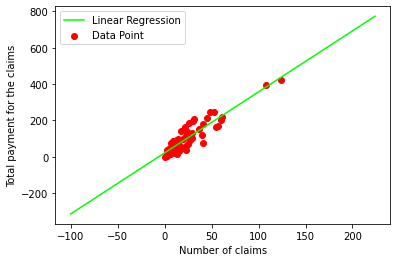

In [11]:
#plotting values 
x_max = np.max(X) + 100
x_min = np.min(X) - 100

#calculating line values of x and y
x_line = np.linspace(x_min, x_max, 1000)
y_line = b0 + b1 * x_line

#plotting line 
plt.plot(x_line, y_line, color='#00ff00', label='Linear Regression')

#plot the data points
plt.scatter(X, Y, color='#ff0000', label='Data Point')

# x-axis label
plt.xlabel('Number of claims')

#y-axis label
plt.ylabel('Total payment for the claims')
plt.legend()
plt.show()

In [12]:
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    
    for i in range(len(test)):
        yhat = b0 + b1 * test['X'][i]
        predictions.append(yhat)
    return predictions

In [13]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual['Y'][i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
    
    train, test = train_test_split(dataset, test_size=0.2)
    train = train.reset_index()
    test = test.reset_index()
    
    predicted = algorithm(train, test)
    actual = test['Y'].reset_index()
    
    rmse = rmse_metric(actual, predicted)
    return rmse

In [14]:
# Test simple linear regression
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))

RMSE: 26.103


# Multilinear Regression

We will give the least-squares estimator of multilinear regression in higher dimensional data.
Let us return to our general linear model
\begin{equation*}
Y = X\beta+\epsilon 
\end{equation*}
, where $\beta:= (\beta_0;\beta_1;\cdots;\beta_{p−1})$. 
Ultimately, our goal is to first find and then analyze the least-squares estimator $\hat{\beta}$ of $\beta$. But first, let us find the least-squares estimate for $\theta:=X\beta$. In other words, we wish to perform the following optimizationproblem: 
\begin{equation*}
\min_{\beta\in \mathbb{R}^p}||Y−X\beta||=  \min_{\theta \in C(X)}||Y−\theta||
\end{equation*}
where $C(X)$ is the columns space of the $X$.
Abstractly speaking, the minimizer solves
\begin{equation*}
\hat\theta =  \mathbf{P}_{C(X)}Y
\end{equation*}
But is there an optimal $\beta$?  As we shall see next, there certainly is a uniqu $\hat \beta$ when $X$ has full rank.

\begin{proposition}\label{prop:Result}
Proposition If rank(X) = p, then the least-squares estimator of  $\beta$ is 

\begin{equation*}
\hat \beta = (X'X)^{-1}X'Y
\end{equation*}
and residual sum of squared errors 

\begin{equation*}
RSS =||(I−\mathbf{P}_{C(X)})Y||
\end{equation*}
and 
\begin{equation*}
\mathbf{P}_{C(X)} = X(X'X)^{-1}X'
\end{equation*}

\end{proposition}


\begin{proposition}\label{prop:Result_2}
$\beta$ is an unbiased estimator of $\beta$, and $Var(\beta) = \sigma^2 (X'X)^{-1}$.
\end{proposition}


\begin{proposition}\label{prop:Result_3}
We wish to also estimate $\sigma^2$ . The estimator of interest to us turns out to
be the following:
\begin{equation*}
S^2 = \dfrac{1}{n-1}RSS
\end{equation*}
\end{proposition}
